In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Split the data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = iris.drop('species',axis=1)
y = iris['species']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((120, 4), (30, 4), (120,), (30,))

#### Build the model

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(max_depth=6, criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

#### Evaluate the model on training data

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

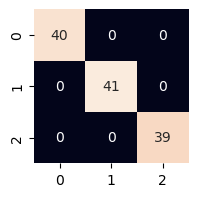

In [11]:
yhat_train = clf.predict(X_train)
cm = confusion_matrix(y_train,yhat_train)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cbar=False)
plt.show()

In [12]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       1.00      1.00      1.00        41
   virginica       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



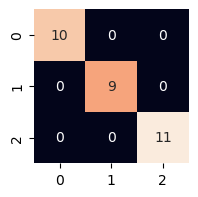

In [13]:
yhat_test = clf.predict(X_test)
cm = confusion_matrix(y_test,yhat_test)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cbar=False)
plt.show()

In [14]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
from sklearn.tree import plot_tree

In [16]:
cnames = iris['species'].unique()
cnames

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
fnames = iris.columns[:-1]
fnames

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

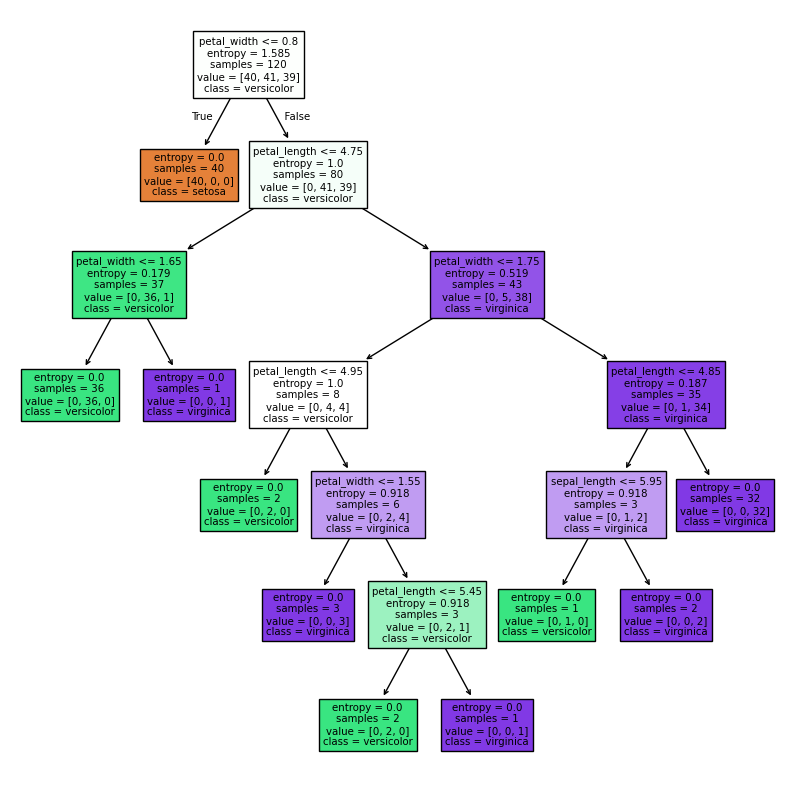

In [18]:
plt.figure(figsize=(10,10))
plot_tree(clf, feature_names=fnames, class_names=cnames, filled=True)
plt.show()